Final Project
Explanation: The script below has three functions. The first script takes in financial data from seperate .csv files and aggregates all the information into a list of lists. Once the data is in a list of lists we convert can visualize that information in a graph. The graph, instead of displaying the information of one file or the other displays the price points of the entire portfolio over time.

The second script cell is a way of finding the value of your portfolio at any given time during the 5 year life of the portfolio. When we did this it adds functionality of the graph by allowing you to see an exact value for your portfolio instead of having to gauge where the line graph is relative to the y axis.

The third and final script allows you to see the allocation of your portfolio over time. For some investors seeing growth or contraction in not enough; they want to see the specific breakup of their portfolio over time. This script takes a input for a specific week, and returns a donut chart showing the breakdown of your portfolio at any given time.

All of these were in an effort to add functionality to our work processing and visualizing data in class. We know some of the features we see in our own brokerage accounts like Robinhood, Webull, and TD Amertitrade, and wanted to try to replicate some of them.

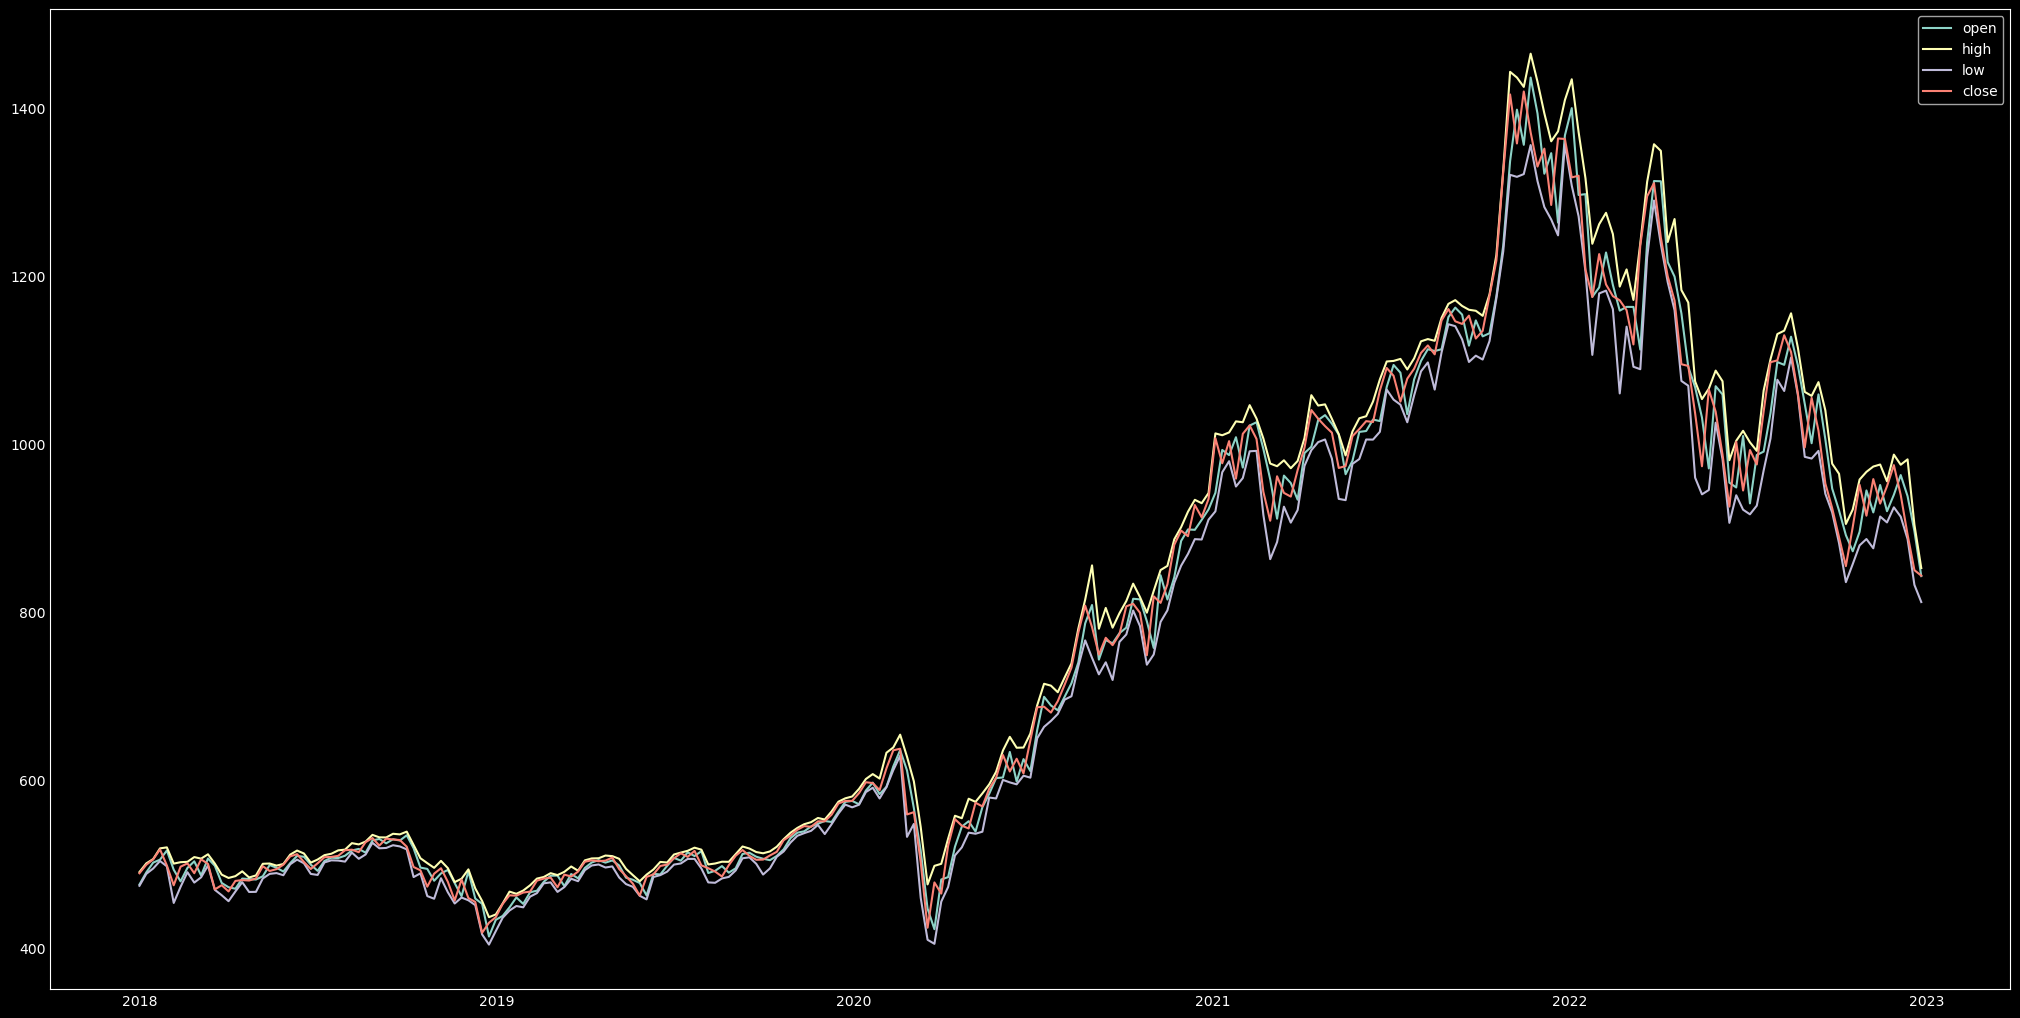

In [12]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

glob.glob('stocks/*.csv')


s = '2023/10/1'
d = datetime.strptime(s,'%Y/%m/%d')

s1 = '2023/10/01 11:04am' #first time point
s2 = '2023/10/01 09:51pm' #second time point
d1 = datetime.strptime(s1,'%Y/%m/%d %I:%M%p')
d2 = datetime.strptime(s2,'%Y/%m/%d %I:%M%p')

stocks = glob.glob('stocks/*.csv')

def get_date(s):
    return datetime.strptime(s, '%Y-%m-%d')

def read_stock(path):
    with open(path,'r') as f: 
        raw    = [row.replace('\n','').split(',') for row in f.readlines()]
        header = raw[0]
        dates,prices   = [],[]
        for row in raw[1:]:
            dates  += [get_date(row[0])]            
            prices += [[float(x) for x in row[1:]]] #CONVERTS VALUES INTO COLUMNS 
    return np.asarray(dates),np.asarray(prices)

dates,prices = read_stock(glob.glob('stocks/*.csv')[0]) 

port_prices = []
port_dates = []

for i in range(len(stocks)):
    dates,prices = read_stock(stocks[i])          
    port_prices.append(prices)
    port_dates.append(dates)
    
#print_prices(port[3][1][1]) #TEST CODE TO SEE INDIVIDUAL PRICE [file, row, column]  

sumport = []

for row in range(len(port_prices[0])):
    sumport.append([])
    for col in range(len(port_prices[0][0])):
        sumport[row].append(port_prices[0][row][col])
        for stx in range(1, len(port_prices)):
            sumport[row][col] += port_prices[stx][row][col]
            
#print(port_prices) TEST CODE

#for stock in port_prices:
    #for data in stock:
        #print(data)
        #for item in data:
            #print(item)

sumport = np.asarray(sumport) # ARRANGES "sumport" AS AN ARRAY FOR VISUALIZATION PROCESS

#print(sumport) TEST CODE TO SEE THE REARRANGED "sumport" FILE
#print(dates[0]) 

plt.rcParams["figure.figsize"] = (20,10) #DEFINES THE SIZE OF THE VISUAL
plt.style.use('dark_background')         #CREATES DARK BACKGROUND, WE CAN COMMENT OUT FOR WHITE BACKGROUND BUT WILL LEAVE AS BLACK
fig, ax = plt.subplots()                 #PROVIDES PARAMETERS FOR FIGURES AXIS
ax.plot(dates,sumport[:,0],label="open")  #PLOTS THE COMBINED OPEN VALUE FOR ALL PORTFOLIO ITEMS 
ax.plot(dates,sumport[:,1],label="high")  #PLOTS THE COMBINED DAILY HIGH FOR THE ENTIRE PORTFOLIO
ax.plot(dates,sumport[:,2],label="low")   #PLOTS THE COMBINED DAILY LOW PORTFOLIO FOR THE ENTIRE PORTFOLIO
ax.plot(dates,sumport[:,3],label="close") #PLOTS THE COMBINED CLOSING VALUE OF YOUR ENTIRE PORTFOLIO 
ax.legend()                              #ADDS A LEGEND
plt.show() 





When given a number,the following script returns the price of your portfolio at any given point during the five years since its inception.

In [13]:
def port_valu():
    print("This is the value of your portfolio over the last 5 years!")
    print()
    print("You have owned these stocks for 260 weeks! Thats five years! Please enter a number between 0 and 260 to see how the value of your portfolio has grown")
    w = int(input("Weeks: "))


    p1 = (port_prices[0][w][0])
    p2 = (port_prices[1][w][0])
    p3 = (port_prices[2][w][0])
    p4 = (port_prices[3][w][0])

    port_value =p1 + p2 + p3 + p4
    print(port_value)
port_valu()

This is the value of your portfolio over the last 5 years!

You have owned these stocks for 260 weeks! Thats five years! Please enter a number between 0 and 260 to see how the value of your portfolio has grown


Weeks:  0


475.334995


When given an number the following script returns a donut chart visualizing the allocation of your portfolios holdings over time.

Lets visualize how the allocation of your portfolio has changed over time

You have owned these stocks for 260 weeks! Thats five years! Please enter a number between 0 and 260 to see how the distribution of your portfolio has changed


Weeks:  0


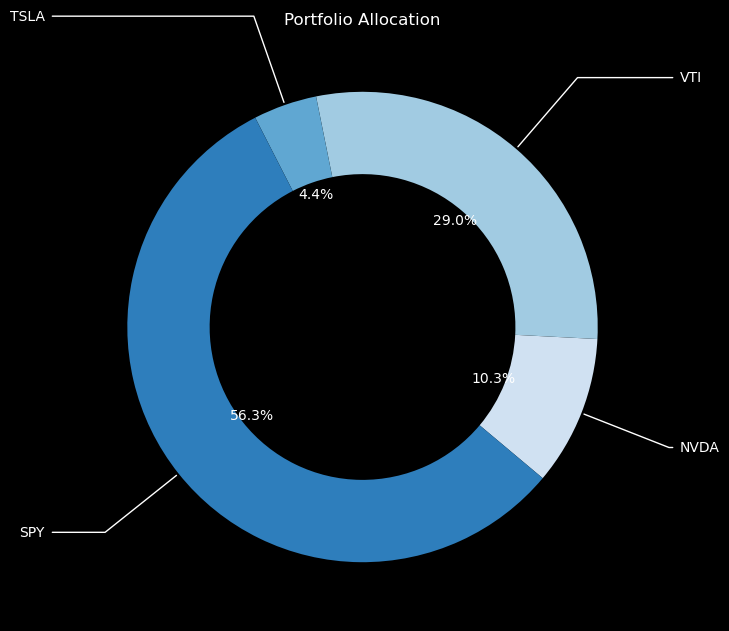

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def visual():
    print("Lets visualize how the allocation of your portfolio has changed over time")
    print()
    print("You have owned these stocks for 260 weeks! Thats five years! Please enter a number between 0 and 260 to see how the distribution of your portfolio has changed")
    w = int(input("Weeks: "))
    
    p1 = (port_prices[0][w][0]) #NVDA
    p2 = (port_prices[1][w][0]) #VTI
    p3 = (port_prices[2][w][0]) #TSLA
    p4 = (port_prices[3][w][0]) #SPY
    

    plt.style.use('_mpl-gallery-nogrid')
    colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, 4))
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie([p1, p2, p3, p4], colors=colors, wedgeprops=dict(width=0.35), startangle=-40,
                                     autopct='%1.1f%%', textprops=dict(color="w"))
    ax.set_title("Portfolio Allocation")
    labels = ["NVDA", "VTI", "TSLA", "SPY"]
    bbox_props = dict(boxstyle="square,pad=0.3", fc="k", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1) / 2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                    horizontalalignment=horizontalalignment, **kw)    
    
    plt.show()
visual()
